# Analyzing Box Office Trends to Drive Microsoft's Entertainment Strategy

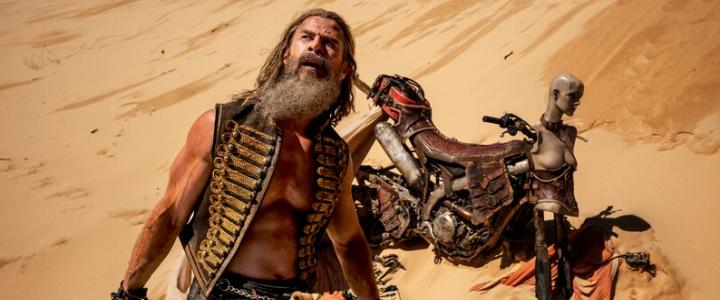
        Photo by Bruce Nash on [theNumber](https://www.the-numbers.com/news/256960830-Weekend-box-office-Furiosa-top-on-slowest-Memorial-Day-weekend-in-years)

## Overview

Microsoft is on the verge of venturing into the film industry and creation of new movie studio. They tasked me to explore and evaluate the film industry and give them recommendations before making their final decision. My recommendation will be based on types of movies (genres) that are most popular, have most releases, highly rated and have most gross profits to help in reduction close to elimination of losses that they might incur in the process.

## Task

Microsoft has noticed that many large companies are producing original video content and wants to join the trend by establishing a new movie studio. However, they lack experience in movie production. You have been tasked with researching the types of films that are currently performing best at the box office. Your goal is to convert these findings into practical recommendations that can guide the head of Microsoft's new movie studio in deciding what types of films to produce.

## Business Problem

Microsoft's primary challenge is to determine if entering the film industry is a viable business venture. They need to identify the types of films they should create, how to achieve profitability and strategies to distinguish themselves and become market leaders in the industry

## Objectives

* Find Most released, popular genres in the film market
* Find genres with most gross profits that could be of benefit to the company
* Find runtime range taken to watch different genres
* Find link and relationships between avg_rating, vote_count, popularity, budget, gross and profits and how they can help in decision making

## Data Understanding

We have several datasets that we will be dealing with, particularly datasets from: 
* tmdb_movies - https://www.themoviedb.org/  
* the_number_movies https://www.the-numbers.com/  
* imdb_movies - im Database consists of several tables; movie_basics, movie_ratings, etc., but the most important tables we will be utilizing from this Database using SQLite are `movie_basics` and `movie_ratings`  


## Importing Libraries and Loading Data

In this task, you import libraries such as `Numpy`, `Pandas`, `Matplotlib`, `Seaborn` and `Sqlite3`, and finally ensuring that any graph plotten will show below the immediate cell using `%matplotlib inline`.

### Importing Libraries

In [141]:
# #importing all the libraries needed to analyse the datasets we have
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Loading Data

In [142]:
# Loading all the three datasets that were readily available
tmdb_movies = pd.read_csv('ZippedData/tmdb.movies.csv', index_col = 0)
the_numbers_movies = pd.read_csv('ZippedData/tn.movie_budgets.csv', index_col = 0)

# We also also connecting im.db data to SQLite so as to be able to 
# visualize it via pandas
conn = sqlite3.connect('ZippedData/im.db')
cur = conn.cursor()

## Data Preprocessing and Cleaning

* Checking The data shape  
* Checking the null values  
* Some statistical information
* Information about data

### 1. IMDB(imdb_movies)

Having a look at im.db data and joining 2 tables using identical id (movie_id) and converting them into a DataFrame 

In [143]:
# Running a query using SQL SELECT method and also using JOIN to connect 
# two tables using idential identifier 
query = """
SELECT * 
   FROM movie_ratings
   JOIN movie_basics AS m
   USING(movie_id)
   ORDER BY m.start_year DESC
;
"""
imdb_movies = pd.read_sql(query, conn)

Dropping all rows where column original_title have duplicates

In [144]:
# Drop all the duplicates in the dataset and showing 5 samples
# of imdb_movies DataFrame
imdb_movies.drop_duplicates(subset='original_title', inplace=True)
imdb_movies.sample(5)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
70700,tt1539086,6.8,341,Vesku from Finland,Vesku,2010,102.0,"Biography,Documentary,Music"
11279,tt5023566,6.7,134,Tough Guys,Tough Guys,2017,76.0,"Action,Documentary,Sport"
38958,tt3647782,7.8,5,A Chair Fit for an Angel,A Chair Fit for an Angel,2014,75.0,"Documentary,History,Music"
47095,tt2233406,7.4,655,Mile... Mile & a Half,Mile... Mile & a Half,2013,87.0,Documentary
33578,tt5198930,7.1,15,Girlfriend Kontrak,Girlfriend Kontrak,2015,100.0,"Drama,Romance"


Here are the column names we will be looking at:-

- movie_id (Unique identifiers for every released movies)  
- averagerating (ratings of every movie)  
- numvotes (Collective votes for each movie)  
- primary_title and original_title (name of the movie)  
- start_year (year the movies was released)  
- runtime_minutes (Hours taken to watch the movie)
- genres (movie type)

In [145]:
# Understanding the number of records and columns available
# after removing dublicates
imdb_movies.shape

(71097, 8)

From the shape above, there are 71097 records and 8 columns in imdb_movies DataFrame

In [146]:
# Getting information about imdb_movies dataset(non-null values
# and Dtype)
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71097 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         71097 non-null  object 
 1   averagerating    71097 non-null  float64
 2   numvotes         71097 non-null  int64  
 3   primary_title    71097 non-null  object 
 4   original_title   71097 non-null  object 
 5   start_year       71097 non-null  int64  
 6   runtime_minutes  63746 non-null  float64
 7   genres           70324 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.9+ MB


From the imdb_movies DataFrame info above, column genres and runtime_minutes have null values. At the moment we will be using ratings. We first need to understand whether the null values for genres should not be considered and if dropped, will it impact our data?

In [147]:
imdb_movies.isna().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7351
genres              773
dtype: int64

From the above insights, we can see that genres have 773 null values! Out of 71097 records which is an indication that 773 genre names are missing!

In [148]:
# Statistical description of imdb_movies DataFrame
imdb_movies.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,71097.000000,7.109700e+04,71097.000000,63746.000000
mean,6.340515,3.500034e+03,2014.323713,94.697895
std,1.476445,3.051619e+04,2.616017,212.566026
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.790000e+02,2017.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


### 2. TMDB(tmdb_movies)

In [149]:
# Drop all the duplicates in the dataset and showing 5 samples of
# tmdb_movies DataFrame
tmdb_movies.drop_duplicates(subset='original_title', inplace=True)
tmdb_movies.sample(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
18380,"[12, 35]",394499,pt,Porta dos Fundos: Contrato Vitalício,2.477,2016-06-30,Porta dos Fundos: Contrato Vitalício,3.6,39
20304,[99],397885,en,Actors of Sound,0.600,2016-06-04,Actors of Sound,6.0,1
10350,[99],381505,en,The Identity Theft of Mitch Mustain,0.600,2013-05-18,The Identity Theft of Mitch Mustain,6.8,5
1195,"[27, 35]",27547,en,Slime City Massacre,1.319,2010-03-17,Slime City Massacre,3.5,5
9427,[18],226576,en,Likeness,1.100,2013-04-19,Likeness,7.0,12


some of the column names we will be dealing with:-  
- genre_id and id (Unique identifiers)  
- original_language (language being used in the movie)  
- original_title and title (name given to the movie)  
- popularity (rating as per popularity)  
- release_date (date the movie was released to the market)  
- vote average (rating of the movie)
- vote_count (number of votes given to the movie)

In [150]:
# Understanding the number of records we have in the dataset
# and how many columns
tmdb_movies.shape

(24835, 9)

From the above, we have 24835 records and 9 columns in the tmdb_movies DataFrame

In [151]:
# More ingformation about tmdb_movies DataFrame
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24835 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          24835 non-null  object 
 1   id                 24835 non-null  int64  
 2   original_language  24835 non-null  object 
 3   original_title     24835 non-null  object 
 4   popularity         24835 non-null  float64
 5   release_date       24835 non-null  object 
 6   title              24835 non-null  object 
 7   vote_average       24835 non-null  float64
 8   vote_count         24835 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [152]:
# Are there any Null values?
tmdb_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

There are no MISSING values in tmdb_movies DataFrame

In [153]:
# Statistical description of tmdb_movies DataFrame
tmdb_movies.describe()

,id,popularity,vote_average,vote_count
count,24835.000000,24835.000000,24835.000000,24835.000000
mean,292238.828991,3.014810,5.983411,174.200805
std,154908.342389,4.206246,1.866482,896.472992
min,27.000000,0.600000,0.000000,1.000000
25%,150749.500000,0.600000,5.000000,1.000000
50%,303623.000000,1.316000,6.000000,5.000000
75%,419152.000000,3.422000,7.000000,25.000000
max,608444.000000,80.773000,10.000000,22186.000000


### 3. THE NUMBERS(the_numbers_movies) 

In [154]:
# Showing the first 5 rows of the_numbers_movies DataFrame
the_numbers_movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Here are some of the column names we will be dealing with:-  
- release_date (the date the movie was released to the market)  
- movie (name of the movie)
- production_budget (amount used to produce the movie)
- domestic_gross and worldwide_gross (profit obtained since the release of the movie)

In [155]:
# Understanding the number of records and columns in
# the_numbers_movies DataFrame
the_numbers_movies.shape

(5782, 5)

There are 5782 records and 5 columns in the_numbers_movies. In the next cell we are going to check on what the DataFrame entails, if there are null values and Dtypes

In [156]:
# More information about the_numbers_movies
# DataFrame
the_numbers_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [157]:
# Are there missing values?
the_numbers_movies.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

the_numbers_movies have got no missing values

   ### Merging DataFrames We Will Be Working With

We are now going convert production budget, domestic gross and worldwide gross into a float by first creating the `remove_dollar_sign` and `remove commas`functions that will help us work the process quickly

In [158]:
# Creating the remove_dollar_sign Function
def remove_dollar_sign(x):
  return (x.strip('$'))  # Remove dollar sign

# Creating the remove_commas Function
def remove_commas(x):
  return float(x.replace(',', ''))  # Remove the commas and convert into a float

We now going to use the above functions in our syntax to remove the dollar(&) and commas for us to remain with a float number. A float number is a number with decimal places

In [159]:
# Use the function to remove the dollar sign ($) and the commas(,)
the_numbers_movies['production_budget']\
    = the_numbers_movies['production_budget'].apply(remove_dollar_sign).apply(remove_commas)
the_numbers_movies['domestic_gross']\
    = the_numbers_movies['domestic_gross'].apply(remove_dollar_sign).apply(remove_commas)
the_numbers_movies['worldwide_gross']\
    = the_numbers_movies['worldwide_gross'].apply(remove_dollar_sign).apply(remove_commas)

Remove all the duplicates in the_numbers_movies

In [160]:
# Drop all the duplicates from the_numbers_movies
# DataFrame
the_numbers_movies.drop_duplicates(subset='movie'\
                                   , keep='first', inplace=True)

# Changing movie column name to original_title
the_numbers_movies.rename(columns ={'movie': 'original_title'}, inplace=True)

# View the first 5 rows
the_numbers_movies.head()

,release_date,original_title,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


 We will now merge both `tmdb_movies`and `imdb_movies`using most common column (original_title)

In [161]:
# Merging Two DataFrames and giving it variable name
# merged_dataset
merged_dataset = pd.merge(tmdb_movies, imdb_movies, how='inner', on='original_title')

# We are also going to drop all the columns that are currently not valuable 
columns_to_drop = ['genre_ids', 'original_language', 'id', 'title', 'release_date']
merged_dataset = merged_dataset.drop(columns = columns_to_drop)

# Show the first few rows of the merged DataFrame
merged_dataset.head()

,original_title,popularity,vote_average,vote_count,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
0,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788,tt0926084,7.7,425530,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery"
1,How to Train Your Dragon,28.734,7.7,7610,tt0892769,8.1,611299,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
2,Iron Man 2,28.515,6.8,12368,tt1228705,7.0,657690,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
3,Inception,27.920,8.3,22186,tt1375666,8.8,1841066,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
4,Percy Jackson & the Olympians: The Lightning T...,26.691,6.1,4229,tt0814255,5.9,165108,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy"


We are going to merge the merged_dataset with `the_numbers_movies` with common column (original_title). 

In [162]:
# Merging Two DataFrames and setting column 'genres' as the index
merged_data = pd.merge(merged_dataset, the_numbers_movies, how='inner', on='original_title')


# Viewing 5 sampled rows of the merged DataFrames
merged_data.sample(5)

,original_title,popularity,vote_average,vote_count,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross
952,22 Jump Street,11.176,6.9,5167,tt2294449,7.0,319504,22 Jump Street,2014,112.0,"Action,Comedy,Crime","Jun 13, 2014",50000000.0,191719337.0,331333876.0
56,Piranha 3D,11.302,5.3,1029,tt0464154,5.4,81327,Piranha 3D,2010,88.0,"Comedy,Horror","Aug 20, 2010",24000000.0,25003155.0,83660160.0
1044,Iris,5.445,7.6,71,tt5598110,6.1,2443,In the Shadow of Iris,2016,99.0,Thriller,"Dec 14, 2001",5500000.0,5580479.0,5580479.0
206,Monster,0.600,5.0,1,tt9077038,7.5,49,Monster,2019,139.0,"Comedy,Drama,Family","Dec 24, 2003",5000000.0,34469210.0,64240813.0
1215,Criminal Activities,7.914,5.9,166,tt3687310,5.8,7739,Criminal Activities,2015,94.0,"Crime,Drama,Thriller","Nov 20, 2015",7000000.0,0.0,386744.0


Just to ensure that we have all the data that is required, we need to add some few columns; `total_gross`, `gross_profit` and `avg_rating` which are very important in our analysis

In [163]:
# Creating new column of 'total_gross' by adding domestic_gross to worldwide gross
merged_data['total_gross'] = merged_data['domestic_gross'] + merged_data['worldwide_gross']

# Creating another column of difference between total gross and production budget
# it will the gross profits made since the release of those movies
merged_data['gross_profit'] = merged_data['total_gross'] - merged_data['production_budget']

# Create new column of average rating by adding vote_average and averagerating and dividing
# the result by two
merged_data['avg_rating'] = (merged_data['vote_average'] + merged_data['averagerating'])/2

Now let's try and viw the table with newly added columns

In [164]:
# We are using the ascending equal False so as to sort our data from the highest
# to the lowest and on our case we will be sorting by gross profit
merged_data = merged_data.sort_values(by='gross_profit', ascending=False)
merged_data.head()

,original_title,popularity,vote_average,vote_count,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,gross_profit,avg_rating
1624,Avengers: Infinity War,80.773,8.3,13948,tt4154756,8.5,670926,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi","Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.726950e+09,2.426950e+09,8.40
1111,Jurassic World,20.709,6.6,14056,tt0369610,7.0,539338,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi","Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2.301125e+09,2.086125e+09,6.80
456,The Avengers,50.289,7.6,19673,tt0848228,8.1,1183655,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi","May 4, 2012",225000000.0,623279547.0,1.517936e+09,2.141215e+09,1.916215e+09,7.85
423,Black Panther,2.058,5.1,11,tt1825683,7.3,516148,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi","Feb 16, 2018",200000000.0,700059566.0,1.348258e+09,2.048318e+09,1.848318e+09,6.20
1632,Incredibles 2,36.286,7.6,6354,tt3606756,7.7,203510,Incredibles 2,2018,118.0,"Action,Adventure,Animation","Jun 15, 2018",200000000.0,608581744.0,1.242521e+09,1.851102e+09,1.651102e+09,7.65


In [165]:
# Statistical information of our merged data
merged_data.describe()

,popularity,vote_average,vote_count,averagerating,numvotes,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,total_gross,gross_profit,avg_rating
count,1741.000000,1741.000000,1741.000000,1741.000000,1.741000e+03,1741.000000,1723.000000,1.741000e+03,1.741000e+03,1.741000e+03,1.741000e+03,1.741000e+03,1741.000000
mean,10.992064,6.168237,1691.672602,6.259966,9.779401e+04,2013.902929,105.233894,3.912315e+07,4.821072e+07,1.194988e+08,1.677095e+08,1.285864e+08,6.214101
std,8.008721,1.071789,2628.892891,1.113486,1.555543e+05,2.534429,18.103887,5.212689e+07,7.820187e+07,2.141219e+08,2.892879e+08,2.503413e+08,0.997650
min,0.600000,0.000000,1.000000,1.600000,5.000000e+00,2010.000000,28.000000,9.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+07,1.150000
25%,6.334000,5.600000,97.000000,5.700000,5.511000e+03,2012.000000,93.000000,5.000000e+06,1.069334e+06,3.623609e+06,5.423532e+06,-4.464230e+05,5.650000
50%,9.669000,6.200000,678.000000,6.400000,4.104300e+04,2014.000000,103.000000,2.000000e+07,2.073872e+07,3.783166e+07,5.976264e+07,3.568435e+07,6.300000
75%,14.437000,6.800000,2080.000000,7.000000,1.172450e+05,2016.000000,115.500000,5.000000e+07,5.825080e+07,1.269313e+08,1.869112e+08,1.399823e+08,6.900000
max,80.773000,10.000000,22186.000000,9.300000,1.841066e+06,2019.000000,180.000000,4.106000e+08,7.000596e+08,2.048134e+09,2.726950e+09,2.426950e+09,8.900000


In [166]:
# More information about the columns, Missing Values and Dtype
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741 entries, 1624 to 1532
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     1741 non-null   object 
 1   popularity         1741 non-null   float64
 2   vote_average       1741 non-null   float64
 3   vote_count         1741 non-null   int64  
 4   movie_id           1741 non-null   object 
 5   averagerating      1741 non-null   float64
 6   numvotes           1741 non-null   int64  
 7   primary_title      1741 non-null   object 
 8   start_year         1741 non-null   int64  
 9   runtime_minutes    1723 non-null   float64
 10  genres             1739 non-null   object 
 11  release_date       1741 non-null   object 
 12  production_budget  1741 non-null   float64
 13  domestic_gross     1741 non-null   float64
 14  worldwide_gross    1741 non-null   float64
 15  total_gross        1741 non-null   float64
 16  gross_profit       17

We will be using the 1739 genres in our nearly cleaned dataset. We leaving at that because we got all the information we got to get started with our analysis

## Exploratory Data Analysis Process

Exploratory Data Analysis (EDA) is an essential step in the data analysis process. It involves summarizing the main characteristics of the data and often includes visual methods. The goal of EDA is to understand the data, identify patterns, detect anomalies, test hypotheses, and check assumptions.


### Top 10 Most Released Genres

In [167]:
# Counting number of times genre is appearing in our merged_data
# DataFrame
most_released = merged_data['genres'].value_counts().head(10)
most_released.head() # Show the first 5

Drama                         94
Adventure,Animation,Comedy    64
Comedy,Drama,Romance          62
Comedy                        62
Comedy,Drama                  58
Name: genres, dtype: int64

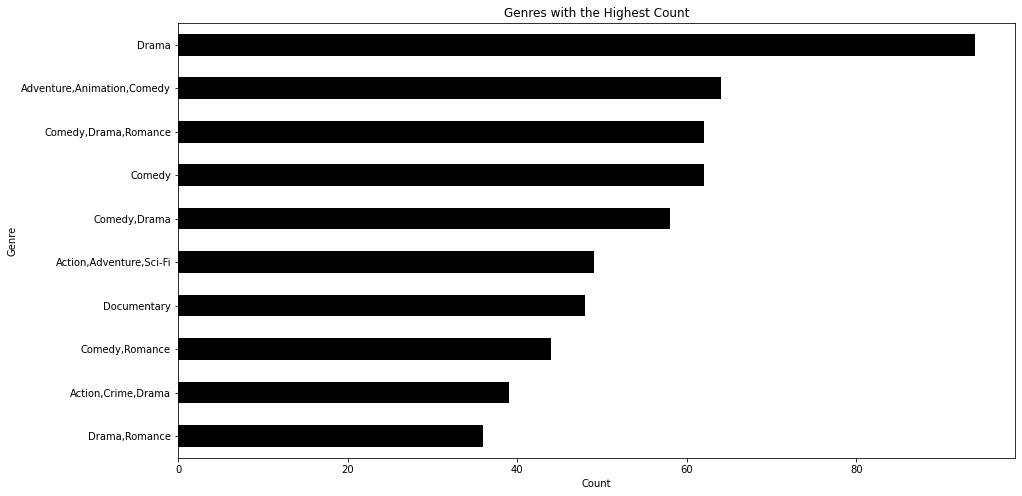

In [168]:
# Plotting the genres counts in horizontal 
most_released.plot(kind='barh', color='black', figsize=(15,8))
plt.title('Genres with the Highest Count')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show();

Here's a horizontal bar chart displaying the number of films by genre. The genres are listed along the y-axis, and the number of films in each genre is indicated on the x-axis. This visualization clearly shows the distribution of films across top 10 most released different genres, with "Drama" having the highest count of 94 films and "Drama, Romance" having the lowest count of 36 films among the listed categories

### Top 10 Rated Genres 

In [169]:
# Create a DataFrame and Group by 'genre' and calculate the average 'rating' for each genre
# then sort the dataframe by avg_rating from highest to lowest
average_rating = merged_data.groupby('genres')['avg_rating'].mean().reset_index()\
.sort_values(by='avg_rating', ascending=False)

# Give the first 10 a variable "highly_rated_genres"
highly_rated_genres = average_rating[average_rating['avg_rating']>= 7.3]
highly_rated_genres.head() # Show the first 5

,genres,avg_rating
215,"Drama,Mystery,War",8.200
87,"Adventure,Drama,Sci-Fi",8.125
163,"Crime,Documentary",8.050
80,"Adventure,Documentary,History",7.850
115,"Biography,Drama,Musical",7.800


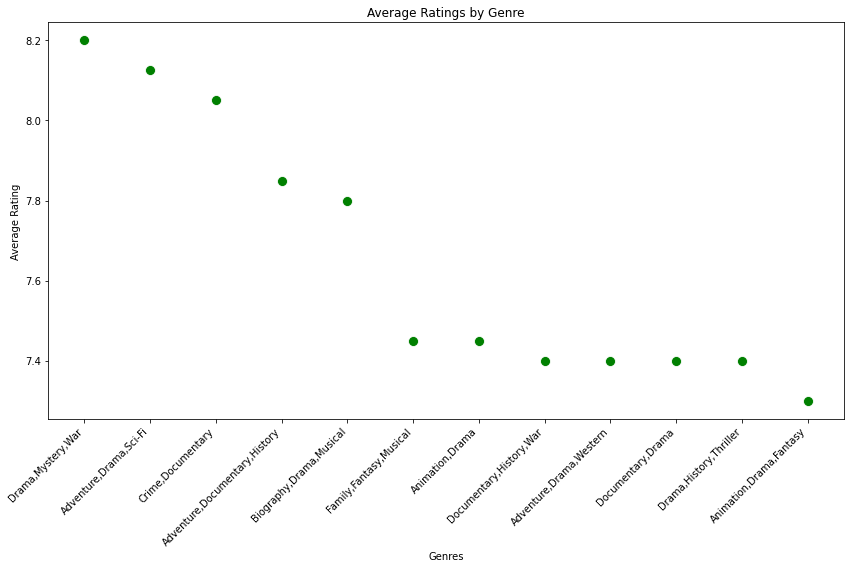

In [170]:
# Plotting scatterplot of avg_rating for every genre for the top 10
# most highly rated genres

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(x='genres', y='avg_rating', data=highly_rated_genres, s=100, color='green')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot title and labels
plt.title('Average Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')

# Show the plot
plt.tight_layout()
plt.show();

From the above plot, venturing into creating top 5 rated type of films would be ideal and profitable because they seem to be interesting to watch.

### Top 10 Most Popular Genres 

In [171]:
# Create a DataFrame and Group by 'genre' and calculate the average 'popularity' for each genre
# then sort the dataframe by popularity from highest to lowest
most_popular = merged_data.groupby('genres')['popularity'].mean().reset_index()\
.sort_values(by='popularity', ascending=False)

# Give top 10 most popular genres a variable "most_popular_genres"
most_popular_genres = most_popular.head(10)
most_popular_genres.head() # Show the first 5

,genres,popularity
93,"Adventure,Fantasy",29.277
188,"Drama,Family,Fantasy",29.056
230,"Family,Fantasy,Musical",26.701
87,"Adventure,Drama,Sci-Fi",25.648
97,"Adventure,Mystery,Sci-Fi",24.980


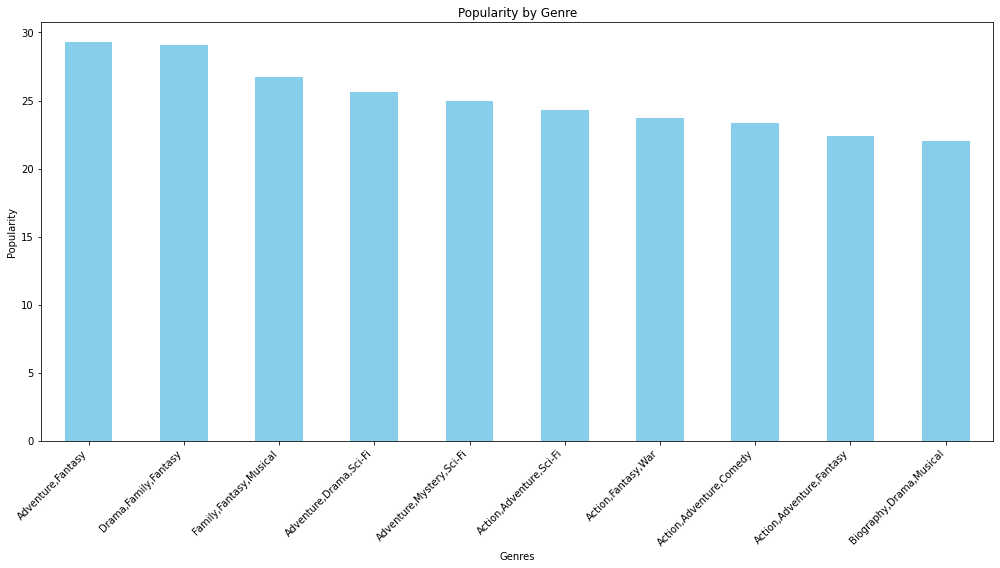

In [172]:
# Plot barplot for the top 10 most popular genres 

ax = most_popular_genres.plot(kind='bar', x='genres', y='popularity', legend=False, color='skyblue', figsize=(14, 8))

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set plot title and labels
plt.title('Popularity by Genre')
plt.xlabel('Genres')
plt.ylabel('Popularity')

# Show the plot
plt.tight_layout()
plt.show();

The above plot shows the top most popular types of genres that you be selective on to suite your best of interest as a company. Adventure, Fantasy genre is the top most popular and thrilling to watch. That is according to the analysed data

### Top 10 Most Profitable Genres

In [173]:
# Create a dataFrame and Group by 'genre' and calculate the average 'gross profit' for each genre
# then sort the dataframe by gross profit from highest to lowest 
most_profitable = merged_data.groupby('genres')['gross_profit'].mean().reset_index()\
.sort_values(by='gross_profit', ascending=False)

# Give the top 10 most profitable genres a variable "most profitable genres"
most_profitable_genres = most_profitable.head(10)
most_profitable_genres.head() # Show the first 5

,genres,gross_profit
230,"Family,Fantasy,Musical",1.603214e+09
87,"Adventure,Drama,Sci-Fi",7.325512e+08
12,"Action,Adventure,Sci-Fi",6.749249e+08
93,"Adventure,Fantasy",6.624354e+08
188,"Drama,Family,Fantasy",6.407027e+08


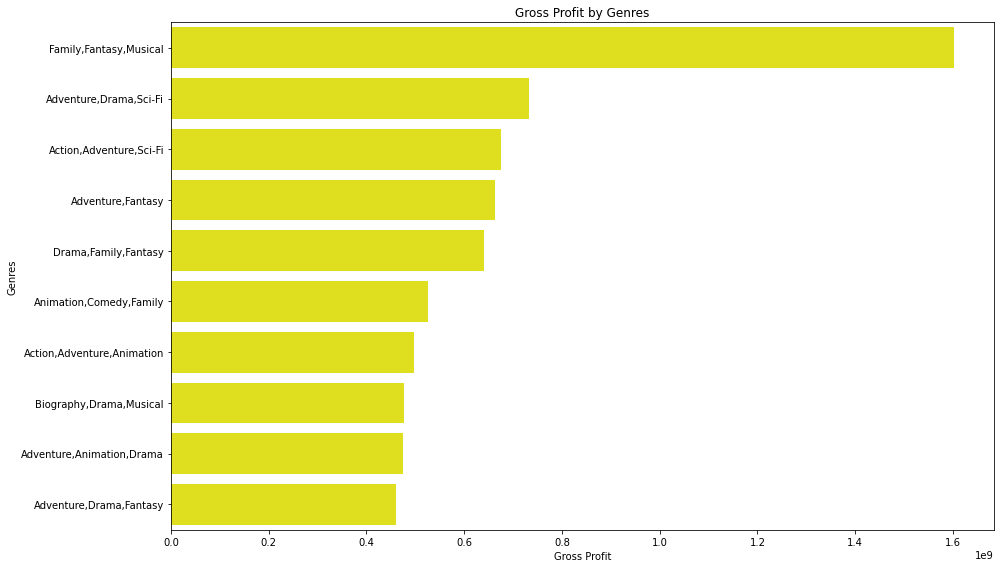

In [174]:
# Plot a barplot for the most profitable genres in the film industry

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a horizontal bar plot using seaborn
sns.barplot(x='gross_profit', y='genres', data=most_profitable_genres, color='yellow')

# Set plot title and labels
plt.title('Gross Profit by Genres')
plt.xlabel('Gross Profit')
plt.ylabel('Genres')

# Show the plot
plt.tight_layout()
plt.show();

According to the plot above, Family, Fantasy, Musical is one of the highly profitable genres of all time. Venturing into this type of genre while creating films would be ideal for it will also mean great and high gross return.

### Top 10 Most Average Runtime of Different Genres

In [175]:
# Create a DataFrame and Group by 'genre' and calculate the average 'runtime_minutes' for each genre
# then sort the dataframe by runtime_minutes from highest to lowest
average_runtime = merged_data.groupby('genres')['runtime_minutes'].mean().reset_index()\
.sort_values(by='runtime_minutes', ascending=False)

# Create variable for the top 10 average_runtime
avg_runtime = average_runtime.head(10)
avg_runtime.head() # Show the first 5

,genres,runtime_minutes
84,"Adventure,Drama,History",161.000000
87,"Adventure,Drama,Sci-Fi",156.500000
201,"Drama,History,Thriller",142.000000
86,"Adventure,Drama,Romance",141.500000
93,"Adventure,Fantasy",139.666667


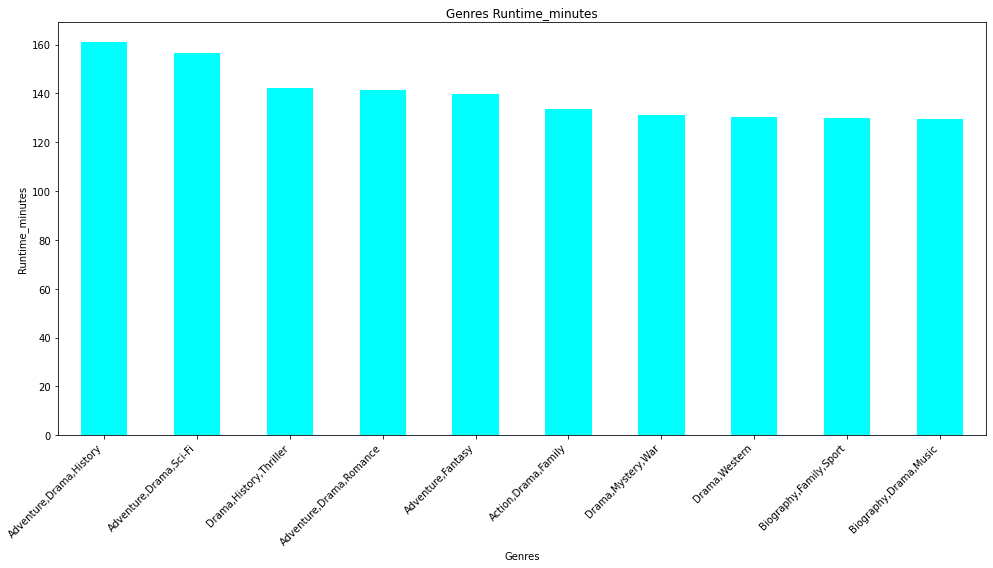

In [176]:
# Plot barplot for the top 10 most popular genres 

ax = avg_runtime.plot(kind='bar', x='genres', y='runtime_minutes', legend=False, color='cyan', figsize=(14, 8))

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set plot title and labels
plt.title('Genres Runtime_minutes')
plt.xlabel('Genres')
plt.ylabel('Runtime_minutes')

# Show the plot
plt.tight_layout()
plt.show();

The above plot show those average minute most of the films take between 129 and 161 minutes. It will be ideal if when venturing into film making, then averagely runtime minutes should be within that range to eliminate boredome. Movies series are always in form of episodes but also on the same, runtime minutes is a factor that is needed to be put into consideration

### Correlation Between avg_rating And popularity

We going to check if there is any type of correlation between avg_rating and popularity of all the genres in our dataset

In [177]:
# Create another DataFrame of variable "find_correlation" which we will be using
# to find correlation between average rating and popularity of all the genres
find_correlation = merged_data.groupby('genres')[['avg_rating', 'popularity']].mean()\
    .reset_index().sort_values(by='avg_rating', ascending=False)

# We now finding correlation between average rating and popularity
correlation = find_correlation['avg_rating'].corr(find_correlation['popularity'])


print(f"The correlation between avg_rating and popularity is: {correlation}")


The correlation between avg_rating and popularity is: 0.28376189468626156


As we can see, correlation between avg_rating and popularity is 0.28376 which is an indication of weak positive correlation. A weak positive correlation between two variables means that as one variable increases, the other variable tends to increase as well, but the relationship is not strong. In other words, there is some positive association between the variables, but it is not consistent or pronounced. Precisely, popularity does not go hand in hand with rating. A genre can be highly rated but less popular

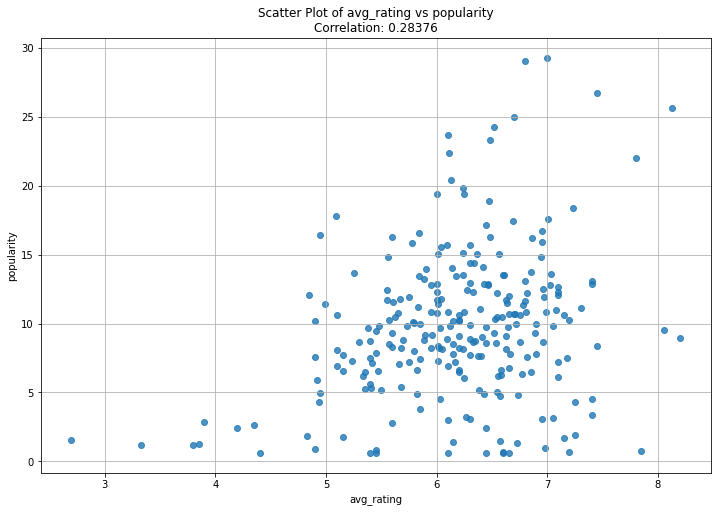

In [178]:
# Create a scatter plot to visualize the correlation between avg_rating and 
# popularity
plt.figure(figsize=(12, 8))
plt.scatter(find_correlation['avg_rating'], find_correlation['popularity'], alpha=0.8)
plt.title(f'Scatter Plot of avg_rating vs popularity\nCorrelation: {correlation:.5f}')
plt.xlabel('avg_rating')
plt.ylabel('popularity')
plt.grid(True)
plt.show();

### Correlation Between gross_profit And popularity

In [179]:
# Create another DataFrame of variable "find_correlation" which we will be using
# to find correlation between average rating and popularity of all the genres
correlation_ = merged_data.groupby('genres')[['gross_profit', 'popularity']].mean()\
    .reset_index().sort_values(by='gross_profit', ascending=False)

# We now finding correlation between average rating and popularity
gross_pop_correlation =correlation_['gross_profit'].corr(correlation_['popularity'])


print(f"The correlation between gross profit and popularity is: {correlation}")

The correlation between gross profit and popularity is: 0.28376189468626156


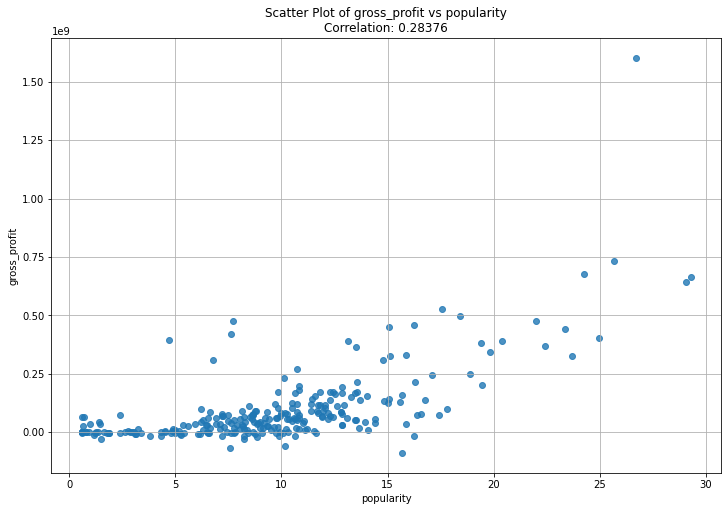

In [180]:
# Create a scatter plot to visualize the correlation between popularity and 
# popularity
plt.figure(figsize=(12, 8))
plt.scatter(correlation_['popularity'], correlation_['gross_profit'], alpha=0.8)
plt.title(f'Scatter Plot of gross_profit vs popularity\nCorrelation: {correlation:.5f}')
plt.xlabel('popularity')
plt.ylabel('gross_profit')
plt.grid(True)
plt.show();

The above correlation between gross profit and popularity is 0.28376 indicating weak positive correlation. From the above graph, popularity of genres seems to be increasing but not the gross profit. This is can't be put into consideration, meaning that, it is not a must a type of genre be popular for it to be profitable. 

### Correlation Between Budget, Gross And Profit

In [181]:
#the correlation btw vote_average and vote_count is weak positive correlation
_corr = merged_data[['production_budget', 'domestic_gross', 'worldwide_gross', 'gross_profit']].corr()
_corr

,production_budget,domestic_gross,worldwide_gross,gross_profit
production_budget,1.000000,0.726409,0.797906,0.701158
domestic_gross,0.726409,1.000000,0.947277,0.971351
worldwide_gross,0.797906,0.947277,1.000000,0.985089
gross_profit,0.701158,0.971351,0.985089,1.000000


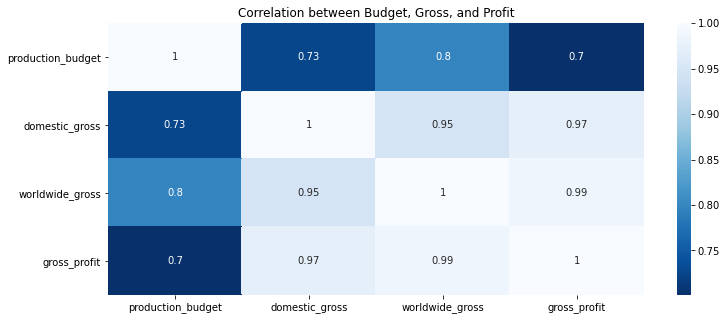

In [182]:
# create a seaborn graph to show the Correlation between production_budget, worldwide_gross, worldwide_gross and profit
plt.figure(figsize = (12,5))
sns.heatmap(_corr, cmap ='Blues_r', annot =True, cbar=True);
plt.title('Correlation between Budget, Gross, and Profit');

From the above heat map, there is strong positive correlation between the gross profit, worldwide gross, domestic gross and production budget. 
A strong positive correlation between the gross profit, worldwide gross, domestic gross, and production budget indicates that as one of these variables increases, the others tend to increase as well. Let's define these variables and explore their interrelationships:  

- Gross Profit: This is the revenue from a film after subtracting the production costs.  
- Worldwide Gross: This is the total revenue a film earns globally.  
- Domestic Gross: This is the revenue a film earns within its home country (usually the USA for Hollywood films).  
- Production Budget: This is the total cost to produce the film.  

This is a factor to be considered more so, when coming up with a production budget, there must be a projection that there is need to ensure probability of having gross profit from the film market are high

### Correlation Between vote_count And avg_rating

In [183]:
rate_vote_corr = merged_data[['vote_count', 'avg_rating']].corr()
rate_vote_corr

,vote_count,avg_rating
vote_count,1.000000,0.402294
avg_rating,0.402294,1.000000


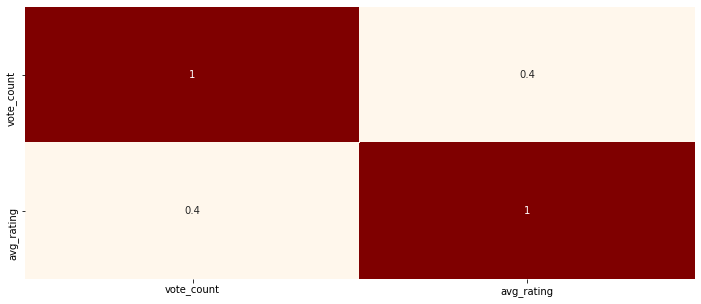

In [184]:
# create a heatmap to show the correlation of the vote_count and the avg_rating
plt.figure(figsize = (12,5))
sns.heatmap(rate_vote_corr, cmap ='OrRd', annot =True, cbar=False);

The above heatmap plot above, there is weak positive correlation between vote count and avg_rating of 0.4. This is an indication that number of vote counts does not determine the rating of genres in the film market

## Conclusion

From different identified genres in the film industry:-  

- Drama is most released type of genre 

- Drama, Mystery, War is the most rated genre 

- Adventure, Fantasy is most popular genre

- Family,Fantasy,Musical is most profitable genre with highest gross profit

- The High average runtime_minute for genres range between 129 to 161 minutes and it's important to having movies within this range. 

- From the provided data obtained from different sources indicates 

  - their is a relationship between rating and popularity of the genres but not pronounced  
  popularity of a movie does not guarantee higher rating and vice versa
  
  - the weak positive correlation between gross profit and popularity is also not pronounced  
  popularity of a created film won't guarantee profitability but exploring diversity on marketing strategy will help.
  
  - there is strong positive correlation between production budget and gross profit  
  This correlation indicates that for one to get more profit, it depends on how much the company willing to put in the     production of movie
  
  - there is weak positive correlation between number of votes given and rating of genres
  It is important to also note that having having higher number of votes does not guarantee higher rating.

When creating films, the company should consider several key factors to ensure success and profitability

- Market Trends and Audience Preferences
- Budget and Financial Planning
- Talent and Creative Team that will help in the success and profitability of the studio
- Marketing Strategy 
- Innovativity
- maximum Runtime minutes for every movie to range between 129 - 160 minutes